# Clustering

## Sección 1

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [9]:
#Carga de los datos 
iris = pd.read_csv("iris.csv")
iris_respuesta = pd.read_csv("iris-con-respuestas.csv")

In [10]:
#Renombrar columnas
dataset_columns =["sepal_length", "sepal_width", "petal_length", "petal_width","species"]
iris.columns = dataset_columns[:-1]
iris_respuesta = dataset_columns

C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


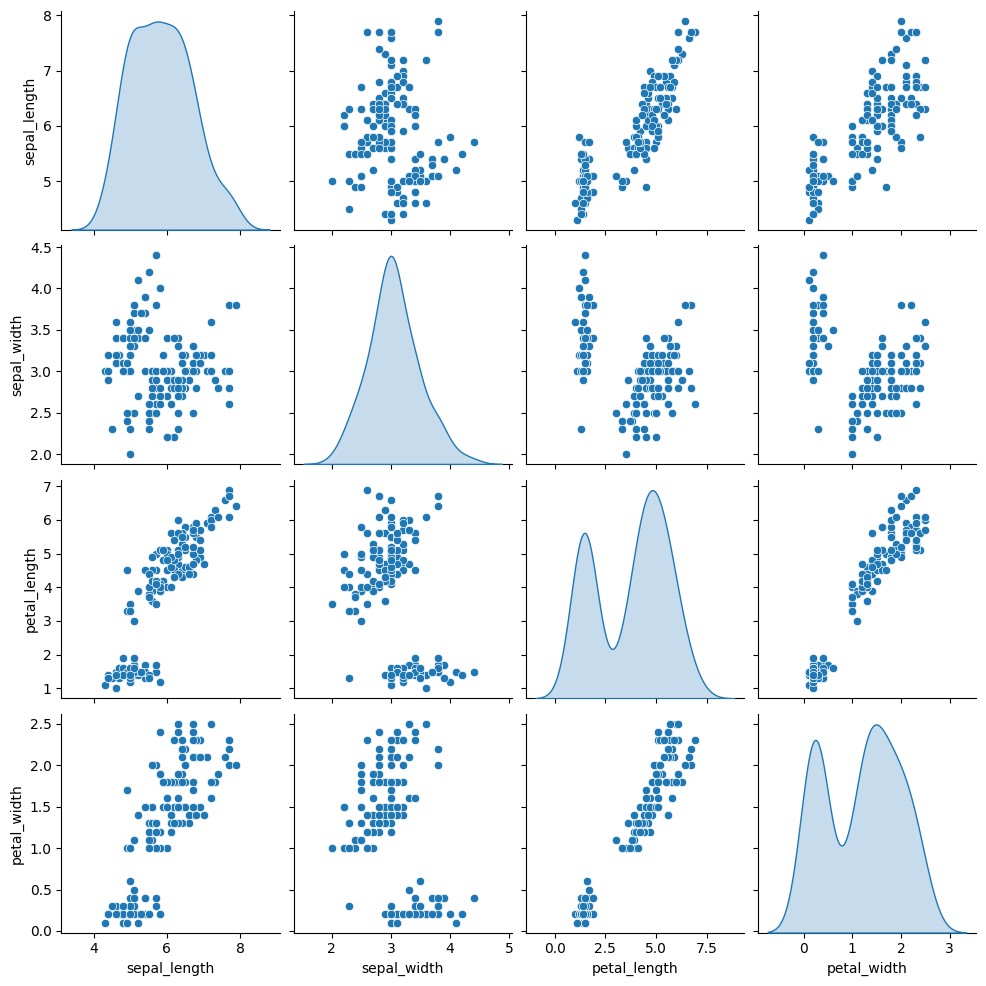

In [11]:
#Visualización inicial
sns.pairplot(iris, diag_kind='kde')
plt.show()

In [12]:
# Aplicando K-Means con K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
iris['cluster_2'] = kmeans_2.fit_predict(iris)

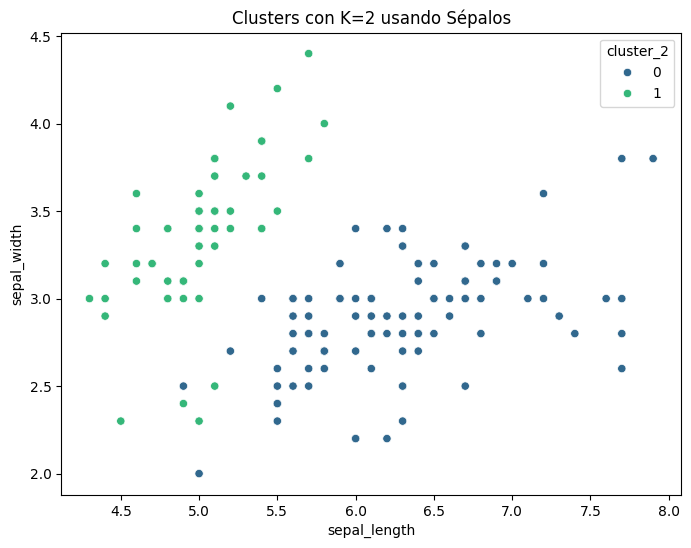

In [13]:
# Visualizar clusters con K=2
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['sepal_length'], y=iris['sepal_width'], hue=iris['cluster_2'], palette='viridis')
plt.title("Clusters con K=2 usando Sépalos")
plt.show()

In [14]:
# Estandarizar
scaler = StandardScaler()
iris_scaled = pd.DataFrame(scaler.fit_transform(iris.iloc[:, :-1]), columns=dataset_columns[:-1])

In [15]:
# K-Means después de estandarización
kmeans_2_scaled = KMeans(n_clusters=2, random_state=42)
iris_scaled['cluster_2'] = kmeans_2_scaled.fit_predict(iris_scaled)

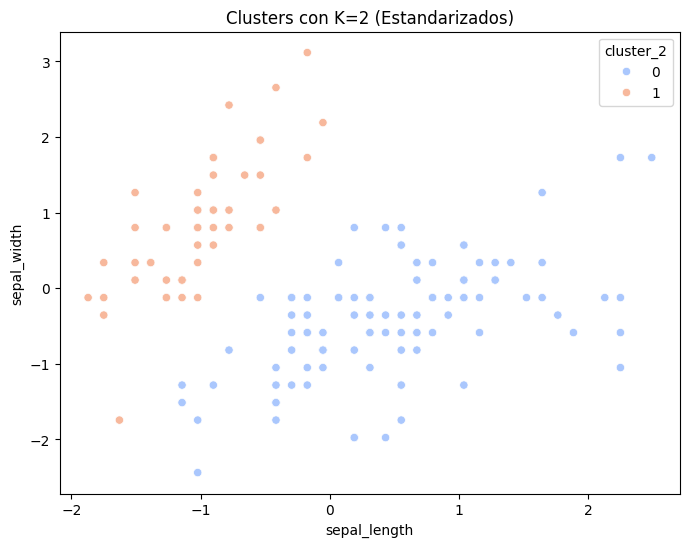

In [16]:
# Visualizar clusters después de estandarización
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['sepal_length'], y=iris_scaled['sepal_width'], hue=iris_scaled['cluster_2'], palette='coolwarm')
plt.title("Clusters con K=2 (Estandarizados)")
plt.show()


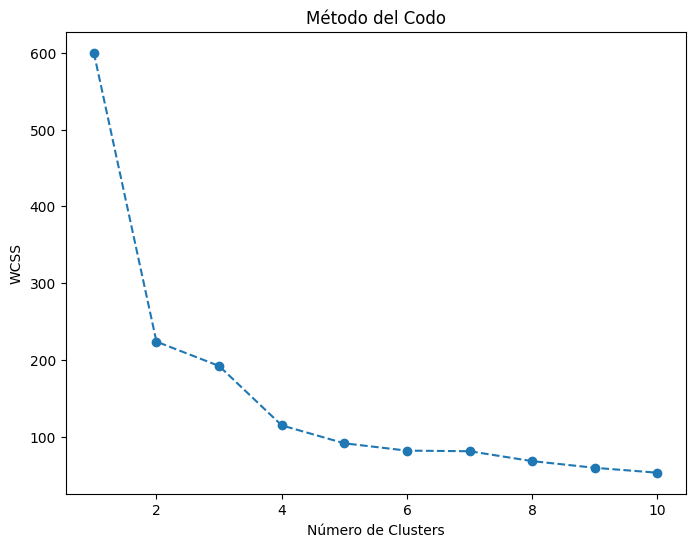

In [17]:
# Método del Codo
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled.iloc[:, :-1])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Método del Codo")
plt.show()

In [18]:
# Encontrar el codo con Kneed
knee_locator = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
k_optimo = knee_locator.elbow
print(f"Número óptimo de clusters según el método del codo: {k_optimo}")

Número óptimo de clusters según el método del codo: 4


In [19]:
# K-Means con K óptimo
kmeans_opt = KMeans(n_clusters=k_optimo, random_state=42)
iris_scaled['cluster_opt'] = kmeans_opt.fit_predict(iris_scaled.iloc[:, :-1])

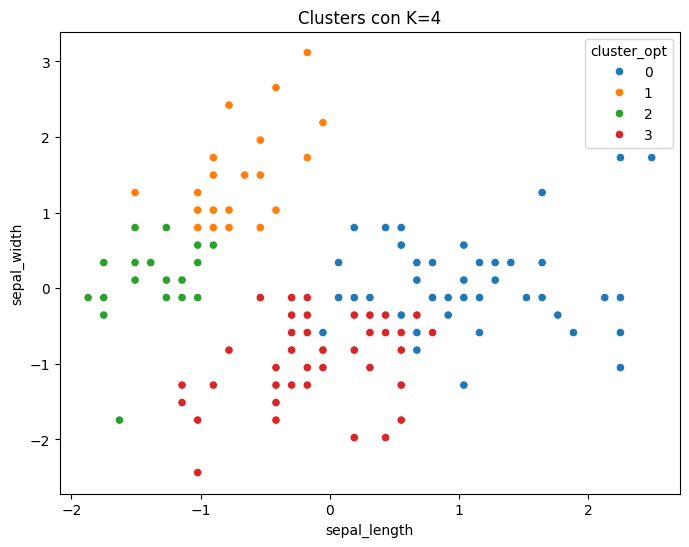

In [20]:

# Visualización de clusters óptimos
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['sepal_length'], y=iris_scaled['sepal_width'], hue=iris_scaled['cluster_opt'], palette='tab10')
plt.title(f"Clusters con K={k_optimo}")
plt.show()

In [21]:
# Comparación con datos reales
iris_scaled['species'] = iris_respuesta['species']
iris_scaled['cluster_opt'] = iris_scaled['cluster_opt'].astype(str)
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['sepal_length'], y=iris_scaled['sepal_width'], hue=iris_scaled['species'], palette='Set1')
plt.title("Clusters Reales de las Especies")
plt.show()


TypeError: list indices must be integers or slices, not str

In [ ]:

# Evaluación del clustering
silhouette_avg = silhouette_score(iris_scaled.iloc[:, :-2], iris_scaled['cluster_opt'].astype(int))
print(f"Índice de Silueta para K óptimo: {silhouette_avg}")


In [ ]:

# Análisis con pétalos
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['petal_length'], y=iris_scaled['petal_width'], hue=iris_scaled['cluster_opt'], palette='tab10')
plt.title("Clusters usando los Pétalos")
plt.show()


In [ ]:
# Comparación de métodos
def compare_methods():
    print("\nCONCLUSIONES:")
    print("- El clustering con pétalos es más efectivo que con sépalos.")
    print("- El método del codo nos dio {k_optimo} clusters, que es cercano a la realidad.")
    print("- La estandarización mejora los resultados en K-Means.")
compare_methods()
